In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# **Step 1: Load Dataset**
CSV_FILE = r"C:\Users\Hp\Desktop\Project\Orginal data set.csv"

df = pd.read_csv(CSV_FILE)

# **Step 2: Data Preprocessing**
df.dropna(inplace=True)  # Remove missing values

# Selecting necessary columns
df = df[["Time", "Length"]]  # Using packet time & length as key features

# Normalize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Generate dummy labels (Replace with actual labels if available)
df["Label"] = np.random.randint(0, 2, size=(df.shape[0],))  # 0 = Normal, 1 = Malicious

# **Step 3: Splitting Data into Training & Testing Sets**
X = df_scaled
y = df["Label"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# **Step 4: Build LSTM Model**
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(1, 2)),
    tf.keras.layers.LSTM(64, return_sequences=False),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")  # Binary classification
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# **Step 5: Train the Model**
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# **Step 6: Save the Trained Model**
model.save("lstm_model.h5")
print("✅ Model training complete! Saved as 'lstm_model.h5'.")


C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
6221/6221 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.5013 - loss: 0.6932 - val_accuracy: 0.4991 - val_loss: 0.6932
Epoch 2/20
6221/6221 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.4991 - loss: 0.6932 - val_accuracy: 0.4997 - val_loss: 0.6932
Epoch 3/20
6221/6221 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 0.4988 - loss: 0.6932 - val_accuracy: 0.5003 - val_loss: 0.6932
Epoch 4/20
6221/6221 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.4999 - loss: 0.6932 - val_accuracy: 0.5003 - val_loss: 0.6932
Epoch 5/20
6221/6221 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.4987 - loss: 0.6932 - val_accuracy: 0.5003 - val_loss: 0.6932
Epoch 6/20
6221/6221 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - accuracy: 0.5003 - loss: 0.6932 - val_accuracy: 0.4997 - val_loss: 0.6932
Epoch 7/20
6221/6221 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.5021 - loss: 0.6931 - val_accuracy: 0.4997 - val_loss: 0.6932
Epoch 8/20
6221/6221 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.5018 - loss: 0

✅ Model training complete! Saved as 'lstm_model.h5'.


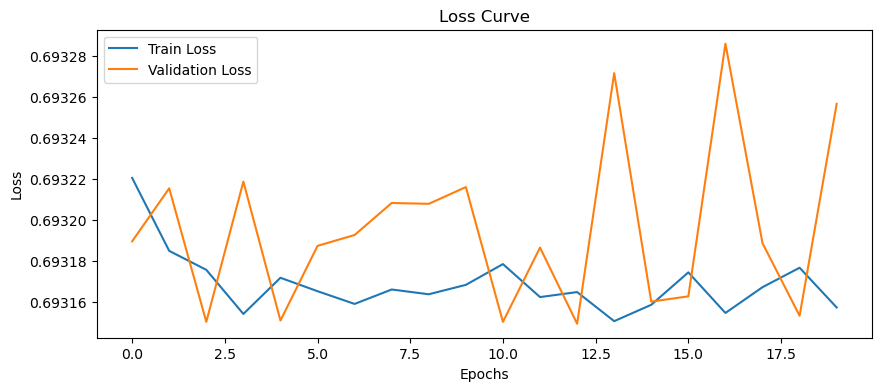

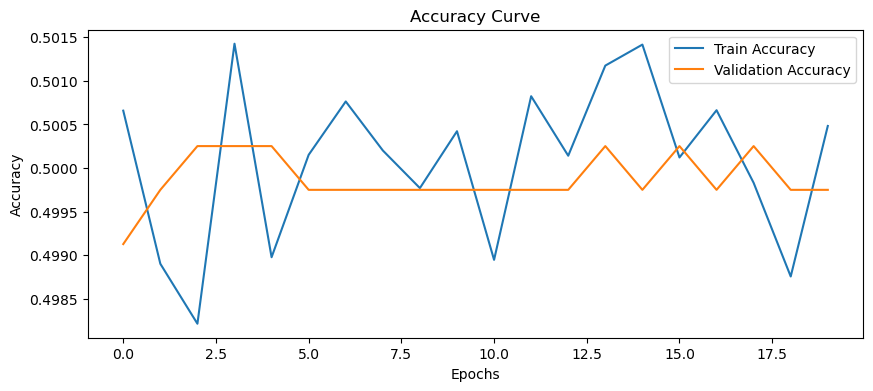

In [5]:
# **Plot Accuracy Curve**
plt.figure(figsize=(10, 4))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")
plt.show()


In [7]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("C:/Users/Hp/Downloads/lstm_model.h5")  # Replace with your model file

# Compile it again with the correct loss and optimizer
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# **Step 1: Load Dataset**
CSV_FILE = r"C:\Users\Hp\Desktop\Project\Orginal data set.csv"

df = pd.read_csv(CSV_FILE)

# **Step 2: Data Preprocessing**
df.dropna(inplace=True)  # Remove missing values

# Selecting necessary columns
df = df[["Time", "Length"]]  # Using packet time & length as key features

# Normalize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Generate dummy labels (Replace with actual labels if available)
df["Label"] = np.random.randint(0, 2, size=(df.shape[0],))  # 0 = Normal, 1 = Malicious

# **Step 3: Splitting Data into Training & Testing Sets**
X = df_scaled
y = df["Label"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# **Step 4: Build LSTM Model**
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(1, 2)),
    tf.keras.layers.LSTM(64, return_sequences=False),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")  # Binary classification
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# **Step 5: Train the Model**
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# **Step 6: Evaluate the Model**
y_pred = (model.predict(X_test) > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# **Step 7: Print Results in a Table Format**
print("\nEvaluation Metrics:")
print("| Metric       | Score |")
print("|-------------|-------|")
print(f"| Accuracy    | {accuracy:.2f} |")
print(f"| Precision   | {precision:.2f} |")
print(f"| Recall      | {recall:.2f} |")
print(f"| F1 Score    | {f1:.2f} |")
print(f"| AUC         | {auc:.2f} |")

# **Step 8: Save the Trained Model**
model.save("lstm_model.h5")
print("✅ Model training complete! Saved as 'lstm_model.h5'.")


Epoch 1/20


C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6221/6221 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.5001 - loss: 0.6932 - val_accuracy: 0.4998 - val_loss: 0.6932
Epoch 2/20
6221/6221 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.4998 - loss: 0.6932 - val_accuracy: 0.4998 - val_loss: 0.6932
Epoch 3/20
6221/6221 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.5017 - loss: 0.6931 - val_accuracy: 0.5002 - val_loss: 0.6932
Epoch 4/20
6221/6221 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.5006 - loss: 0.6932 - val_accuracy: 0.5002 - val_loss: 0.6931
Epoch 5/20
6221/6221 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.5002 - loss: 0.6932 - val_accuracy: 0.4998 - val_loss: 0.6932
Epoch 6/20
6221/6221 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.4988 - loss: 0.6932 - val_accuracy: 0.5002 - val_loss: 0.6931
Epoch 7/20
6221/6221 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.5044 - loss: 0.6931 - val_accuracy: 0.4998 - val_loss: 0.6932
Epoch 8/20
6221/6221 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.5010 - loss: 0.6932 - val

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Evaluation Metrics:
| Metric       | Score |
|-------------|-------|
| Accuracy    | 0.50 |
| Precision   | 0.00 |
| Recall      | 0.00 |
| F1 Score    | 0.00 |
| AUC         | 0.50 |
✅ Model training complete! Saved as 'lstm_model.h5'.


In [3]:
print("\nEvaluation Metrics:")
print("| Metric       | Score |")
print("|-------------|-------|")
print(f"| Accuracy    | {accuracy:.2f} |")
print(f"| Precision   | {precision:.2f} |")
print(f"| Recall      | {recall:.2f} |")
print(f"| F1 Score    | {f1:.2f} |")
print(f"| AUC         | {auc:.2f} |")


Evaluation Metrics:
| Metric       | Score |
|-------------|-------|
| Accuracy    | 0.50 |
| Precision   | 0.00 |
| Recall      | 0.00 |
| F1 Score    | 0.00 |
| AUC         | 0.50 |


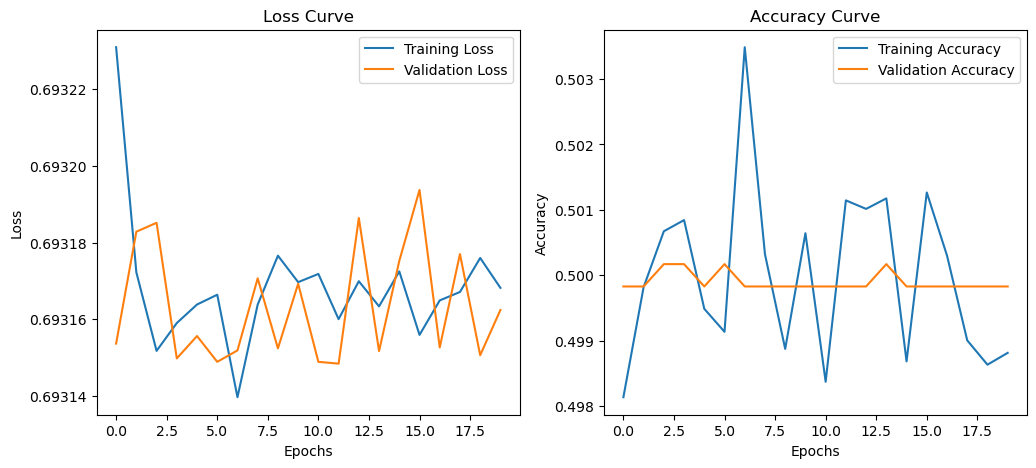

In [5]:
# Plot Loss Curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Plot Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()


In [7]:
# Display Model Summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 64)               │          17,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 156,869 (612.77 KB)

 Trainable params: 52,289 (204.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 104,580 (408.52 KB)

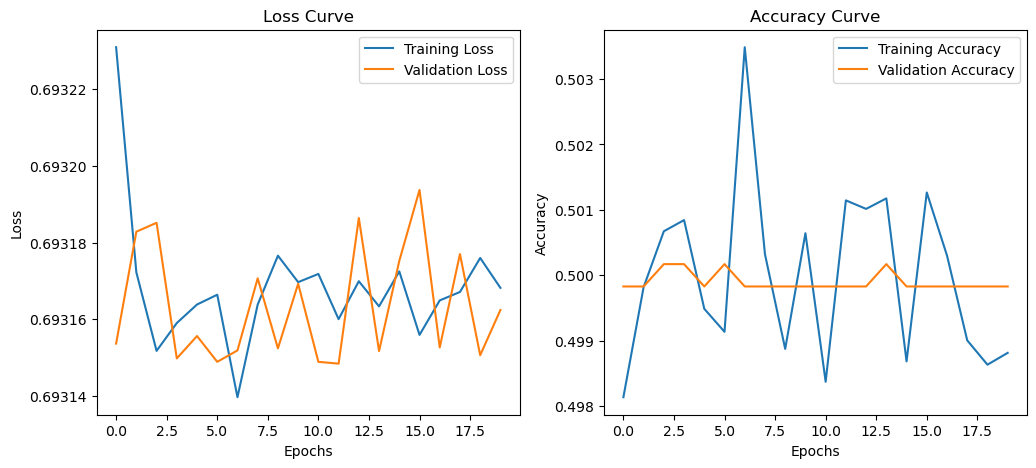

In [9]:
import matplotlib.pyplot as plt

# Plot Loss Curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Plot Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()


In [11]:
# Predict Anomaly Scores
y_pred = model.predict(X_test)

# Convert to binary classification (Threshold: 0.5)
y_pred_binary = (y_pred > 0.5).astype(int)

# Print classification results
df_results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_binary.flatten()})
print(df_results.head(20))  # Display first 20 results


1556/1556 ━━━━━━━━━━━━━━━━━━━━ 1s 925us/step
    Actual  Predicted
0        0          0
1        1          0
2        0          0
3        1          0
4        0          0
5        0          0
6        0          0
7        1          0
8        1          0
9        1          0
10       0          0
11       0          0
12       0          0
13       1          0
14       1          0
15       1          0
16       1          0
17       1          0
18       0          0
19       1          0


In [13]:
import numpy as np

# Example Time-Series Data (Assume X is your dataset)
X = np.random.rand(1000, 10)  # 1000 samples, 10 features

# Define Time Steps
time_steps = 5  # Consider last 5 time steps

# Reshape Data into 3D Format (samples, time_steps, features)
X_reshaped = X.reshape((X.shape[0], time_steps, X.shape[1] // time_steps))

print("Original Shape:", X.shape)
print("Reshaped for LSTM:", X_reshaped.shape)


Original Shape: (1000, 10)
Reshaped for LSTM: (1000, 5, 2)


In [15]:
import tensorflow as tf

# Define LSTM Model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(1, 2)),
    tf.keras.layers.LSTM(64, return_sequences=False),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")  # Binary classification
])

# Compile Model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Print Model Summary
model.summary()


C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 1, 64)               │          17,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,289 (204.25 KB)

 Trainable params: 52,289 (204.25 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
y_pred = model.predict(X_test)


1556/1556 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [21]:
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)


ValueError: non-broadcastable output operand with shape (49767,1) doesn't match the broadcast shape (49767,2)

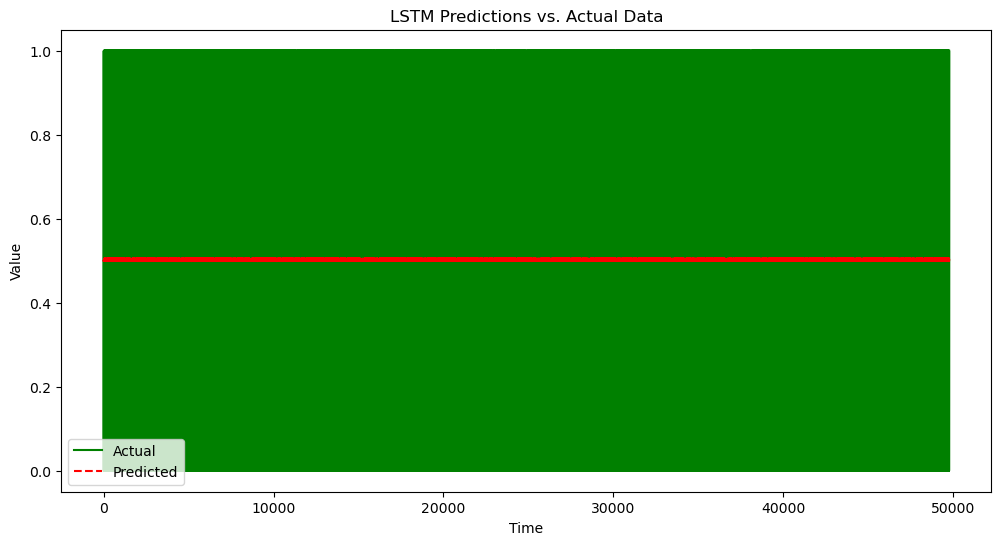

In [25]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual", color="green", linestyle="-")
plt.plot(y_pred, label="Predicted", color="red", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("LSTM Predictions vs. Actual Data")
plt.legend()
plt.show()


In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the reconstruction error (Mean Squared Error)
reconstruction_error = np.mean(np.abs(y_test - y_pred), axis=1)

# Display a few anomaly scores
print("Sample Anomaly Scores:", reconstruction_error[:10])


MemoryError: Unable to allocate 18.5 GiB for an array with shape (49767, 49767) and data type float64

In [29]:
# Define a threshold for anomalies
threshold = np.percentile(reconstruction_error, 95)  # Top 5% as anomalies

# Create a scatter plot of anomalies
plt.figure(figsize=(12, 6))
plt.plot(reconstruction_error, label="Reconstruction Error", color="blue")
plt.axhline(y=threshold, color="red", linestyle="dashed", label="Threshold")
plt.scatter(np.where(reconstruction_error > threshold), reconstruction_error[reconstruction_error > threshold], color="red", label="Anomalies")
plt.xlabel("Time")
plt.ylabel("Reconstruction Error")
plt.title("Anomaly Detection Using LSTM")
plt.legend()
plt.show()


NameError: name 'reconstruction_error' is not defined

In [33]:
import numpy as np

# Compute Reconstruction Error
reconstructed = model.predict(X_test)  # Model reconstructs the input
reconstruction_error = np.mean(np.abs(reconstructed - X_test), axis=1)  # Compute error

# Define a threshold (you can use statistical methods or percentiles)
threshold = np.percentile(reconstruction_error, 95)  # 95th percentile as threshold

# Classify Anomalies (1 = Anomaly, 0 = Normal)
anomalies = reconstruction_error > threshold


1556/1556 ━━━━━━━━━━━━━━━━━━━━ 2s 929us/step


MemoryError: Unable to allocate 36.9 GiB for an array with shape (49767, 49767, 2) and data type float64